# Storytelling Daily Exchange Rates

<font color='blue'> Objective </font>: The goal of this project is to visualize the Euro-Dollar daily exchange rates between for the years 2017 - 2020 and particlarly compare the exchange rate trend during  the **Global Pandemic** period of 2020 with the previous years.

<font color='blue'> Source of Data </font>: The data used is being sourced from European Central Bank.  
**Note**: the datasets gets regular updates - we downloaded it on January 2021

In [1]:
import pandas as pd, numpy as np 

In [2]:
exchange_rates = pd.read_csv(
    'euro-daily-hist_1999_2020.csv')

exchange_rates

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

# Data Cleaning

Our focus in this guided project will be on the exchange rate between the euro and the American dollar. 
We will be:
* renaming the `[Us dollar]` and the `Period\Unit:` columns to `US_dollar` and `Time`
* change the `Time` column to a `datetime` data type
* sort the values by `Time` in ascending order.
* reset the index (and drop the initial index)

In [4]:
exchange_rates.rename({'[US dollar ]':'US_dollar',
                      'Period\\Unit:': 'Time'}, axis = 1,
                      inplace=True)

exchange_rates['Time'] = pd.to_datetime(exchange_rates[
    'Time'])

exchange_rates.sort_values('Time',inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)


In [5]:
euro_to_dollar = exchange_rates.copy()[['Time',
                                       'US_dollar']]

euro_to_dollar.US_dollar.value_counts(dropna=False)


-         62
1.2276     9
1.1215     8
1.1305     7
1.1218     6
          ..
1.4547     1
1.5806     1
0.9796     1
0.8705     1
1.2141     1
Name: US_dollar, Length: 3528, dtype: int64

In [6]:
euro_to_dollar.query('US_dollar != "-"', inplace=True)

euro_to_dollar['US_dollar'] = euro_to_dollar[
    'US_dollar'].astype('float')

euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


# Rolling Mean

We will calculate the rolling mean for a 30 day window

In [7]:
euro_to_dollar['rolling_mean'] = euro_to_dollar[
    'US_dollar'].rolling(30).mean()

# Coming Up with an Idea

We will generate line plots for the euro_dollar during year 2020 - pandemic and 2016-2019

# Sketching The Graph

In [8]:
euro_to_dollar['year'] = euro_to_dollar.Time.dt.year
euro_to_dollar.year.value_counts(dropna=False)

2004    259
1999    259
2010    258
2011    257
2016    257
2020    257
2005    257
2008    256
2012    256
2015    256
2009    256
2019    255
2013    255
2000    255
2017    255
2002    255
2006    255
2014    255
2018    255
2003    255
2007    255
2001    254
2021      5
Name: year, dtype: int64

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
from matplotlib.ticker import NullLocator

%matplotlib inline

plt.style.use('fivethirtyeight')

# plt.style.available - shows the styles available

In [10]:
df_select = euro_to_dollar.copy()[
    euro_to_dollar['year'].isin(
        [2017,2018,2019,2020])]

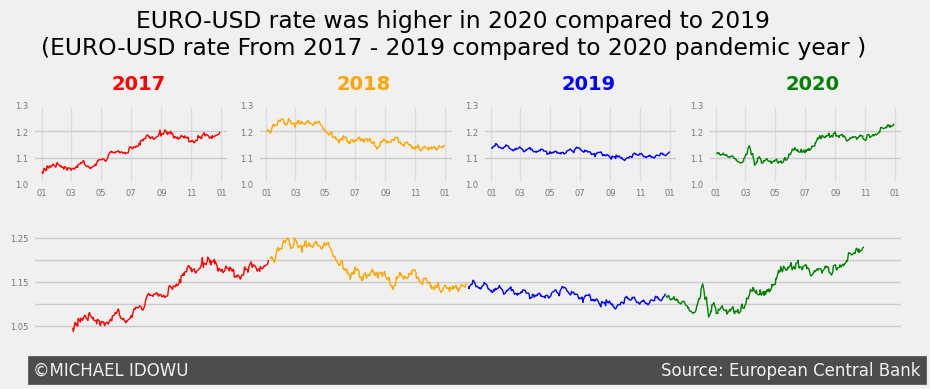

In [11]:
year = [2017,2018,2019,2020]

color = ['red','orange','blue','green']

#adjust the width ratios of  different axis object
# columns and height ratios of the rows

width = [1,1,1,1]
height = [1,1.7]

gs_kw = dict(width_ratios = width, 
             height_ratios = height)

fig, axs = plt.subplots(nrows=2,ncols=4,
                         figsize=(10,3),
                       gridspec_kw = gs_kw
                       ) #constrained_layout
                                            # to spread out the axes object

#create a new subplot with requred dimension using gridspec
gs = axs[1,0].get_gridspec()

for ax in axs[1,0:]:
    ax.remove()
ax5 = fig.add_subplot(gs[1,0:])

for yr,ax,n,c in zip(year[:4],axs.reshape(-1),
                     range(4),color):
    
    yr_df =euro_to_dollar[euro_to_dollar.year == yr]
    time= yr_df['Time']
    us_dollar = yr_df['US_dollar']
    roll_m = yr_df['rolling_mean']
    
    ax.plot(time, us_dollar,c = c,linewidth=1)
        
    # adjusting the x-axis locator for datetime dtype
        
    years= mdates.YearLocator()
    months= mdates.MonthLocator(interval=2)
    y = NullLocator() # helps to hide ticks
        
    # strftime datetype
    my_fmt = mdates.DateFormatter('%b-%y') 
    minor_fmt= mdates.DateFormatter('%m')
        
    ax.xaxis.set_major_formatter(my_fmt)
    ax.xaxis.set_minor_formatter(minor_fmt)
        
    ax.xaxis.set_major_locator(y) #use the NullLocator
                                  # to hide the major ticks
    
    ax.xaxis.set_minor_locator(months)
    ax.set_yticks([1.0,1.1,1.2,1.3])
    
    ax.set_ylim([1, 1.3])
        
    ax.xaxis.grid(True, which='minor', alpha=.5) #display
                                # the minor grid line
        
    ax.text(s=str(yr), y = 1.2, x = 0.4,transform =
            ax.transAxes,
            weight='bold', color=c
           ) # ax.transAxes helps to 
                        # select x-coord postion for
                        # datetime dtype


    ax.tick_params(labelsize= 6)
    for y_ in ax.get_yticklabels():
        y_.set_alpha(.5)
        
    for l in ax.get_xminorticklabels():
        l.set_fontsize(6)
        l.set_alpha(.5)

#     ax.get_xaxis().set_tick_params(which='major',
#                                pad=7)  
#                             #move the major 
#                             #  tick down
            
    
for yr_,c_ in zip(year,color):
    df=df_select[df_select.year== yr_]
    ax5.plot(df['Time'],df['US_dollar'], c =c_,
            linewidth=1)
ax5.xaxis.grid(False)
ax5.tick_params(labelbottom=False,labelsize=6)

ax5.set_yticks([1.05,1.1,1.15,1.2,1.25]) # must set yticks
                                        # before setting yticklabels
ax5.set_yticklabels(['1.05','','1.15','','1.25'])

for t_ in ax5.get_yticklabels():
    t_.set_alpha(.5)
    
ax5.set_ylim([1,1.3])

ax5.text(x=0, y=-0.2,s='©MICHAEL IDOWU'+' '*90 +
         'Source: European Central Bank',
        color = '#f0f0f0',
        backgroundcolor = '#4d4d4d',
        size=12, transform= ax5.transAxes)

# to adjust the space between axs objects.

fig.subplots_adjust(wspace=0.15,hspace=0.3)


plt.suptitle(x=0.5,y=1.2,
             t=
'EURO-USD rate was higher in 2020 compared to 2019'+'\n'+
'(EURO-USD rate From 2017 - 2019 compared to 2020 pandemic year )')

plt.show()